# 초기 세팅

In [1]:
import pandas as pd
import numpy as np

from glob import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

pd.pandas.set_option('display.max_columns', None)

In [2]:
# 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 모델 평가 및 train과 test의 분리
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing import image
from tensorflow.python.keras.utils import np_utils
# from keras.utils import np_utils

# 데이터 불러오기

In [5]:
DATA_FOLDER = "archive"
result = os.listdir(DATA_FOLDER)
print(result)

['Cleavers', '.DS_Store', 'Sugar beet', 'Common Chickweed', 'Loose Silky-bent', 'Scentless Mayweed', 'Shepherd’s Purse', 'Fat Hen', 'Common wheat', 'Black-grass', 'nonsegmentedv2', 'Small-flowered Cranesbill', 'Charlock', 'Maize']


In [6]:
# 폴더 안 파일 정보 가져오기
for folder_name in os.listdir(DATA_FOLDER):
    folder_path = os.path.join(DATA_FOLDER,folder_name)
    for image_path in glob(os.path.join(folder_path,"*.png")):
        print(image_path)

archive/Cleavers/348.png
archive/Cleavers/176.png
archive/Cleavers/88.png
archive/Cleavers/162.png
archive/Cleavers/189.png
archive/Cleavers/77.png
archive/Cleavers/63.png
archive/Cleavers/228.png
archive/Cleavers/200.png
archive/Cleavers/214.png
archive/Cleavers/215.png
archive/Cleavers/201.png
archive/Cleavers/229.png
archive/Cleavers/62.png
archive/Cleavers/188.png
archive/Cleavers/76.png
archive/Cleavers/163.png
archive/Cleavers/177.png
archive/Cleavers/89.png
archive/Cleavers/149.png
archive/Cleavers/161.png
archive/Cleavers/175.png
archive/Cleavers/60.png
archive/Cleavers/74.png
archive/Cleavers/48.png
archive/Cleavers/217.png
archive/Cleavers/203.png
archive/Cleavers/202.png
archive/Cleavers/216.png
archive/Cleavers/49.png
archive/Cleavers/75.png
archive/Cleavers/61.png
archive/Cleavers/174.png
archive/Cleavers/160.png
archive/Cleavers/148.png
archive/Cleavers/164.png
archive/Cleavers/170.png
archive/Cleavers/158.png
archive/Cleavers/59.png
archive/Cleavers/65.png
archive/Cleave

In [7]:
# 데이터프레임
images_df = []
for folder_name in os.listdir(DATA_FOLDER):
    folder_path = os.path.join(DATA_FOLDER, folder_name)
    for image_path in glob(os.path.join(folder_path, "*.png")):
        tmp = pd.DataFrame([image_path, folder_name]).T
        images_df.append(tmp)
# 가공 전 확인
images_df

[                          0         1
 0  archive/Cleavers/348.png  Cleavers,
                           0         1
 0  archive/Cleavers/176.png  Cleavers,
                          0         1
 0  archive/Cleavers/88.png  Cleavers,
                           0         1
 0  archive/Cleavers/162.png  Cleavers,
                           0         1
 0  archive/Cleavers/189.png  Cleavers,
                          0         1
 0  archive/Cleavers/77.png  Cleavers,
                          0         1
 0  archive/Cleavers/63.png  Cleavers,
                           0         1
 0  archive/Cleavers/228.png  Cleavers,
                           0         1
 0  archive/Cleavers/200.png  Cleavers,
                           0         1
 0  archive/Cleavers/214.png  Cleavers,
                           0         1
 0  archive/Cleavers/215.png  Cleavers,
                           0         1
 0  archive/Cleavers/201.png  Cleavers,
                           0         1
 0  archive/Cleaver

In [8]:
# 가공 
images_df = pd.concat(images_df, axis=0, ignore_index=True)
images_df.columns = ["image", "target"]
images_df.head(10)

,image,target
0,archive/Cleavers/348.png,Cleavers
1,archive/Cleavers/176.png,Cleavers
2,archive/Cleavers/88.png,Cleavers
3,archive/Cleavers/162.png,Cleavers
4,archive/Cleavers/189.png,Cleavers
5,archive/Cleavers/77.png,Cleavers
6,archive/Cleavers/63.png,Cleavers
7,archive/Cleavers/228.png,Cleavers
8,archive/Cleavers/200.png,Cleavers
9,archive/Cleavers/214.png,Cleavers


In [9]:
# class별 이미지 분류(갯수)
images_df["target"].value_counts()

Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
Shepherd’s Purse             274
Maize                        257
Common wheat                 253
Name: target, dtype: int64

In [10]:
# 첫 번째 row 추출
images_df.loc[ 0, "image" ]

'archive/Cleavers/348.png'

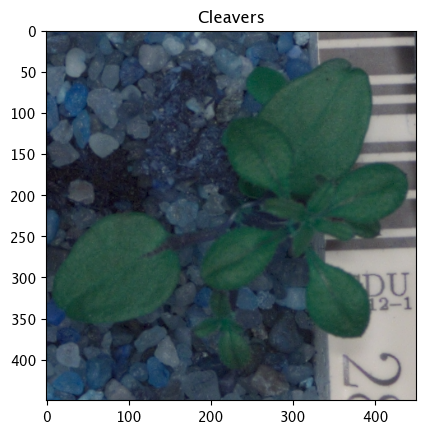

In [11]:
# 이미지 화면에 출력
def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'target'])
    plt.imshow(im)
plot_single_image(images_df, 0)

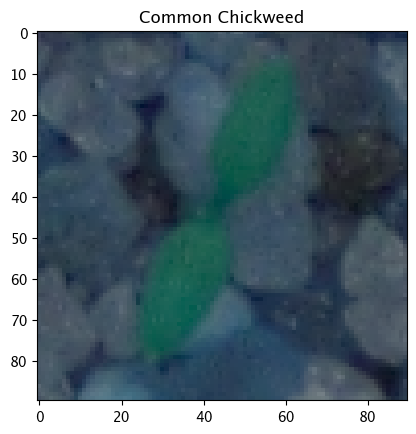

In [12]:
plot_single_image(images_df, 1000)

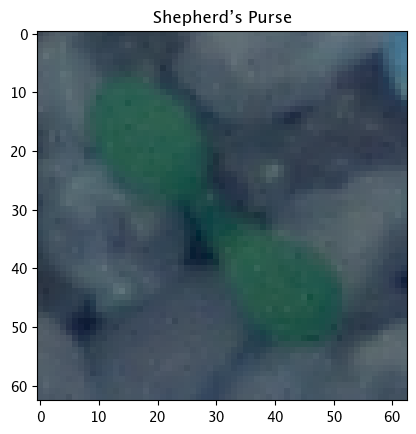

In [13]:
plot_single_image(images_df, 3000)

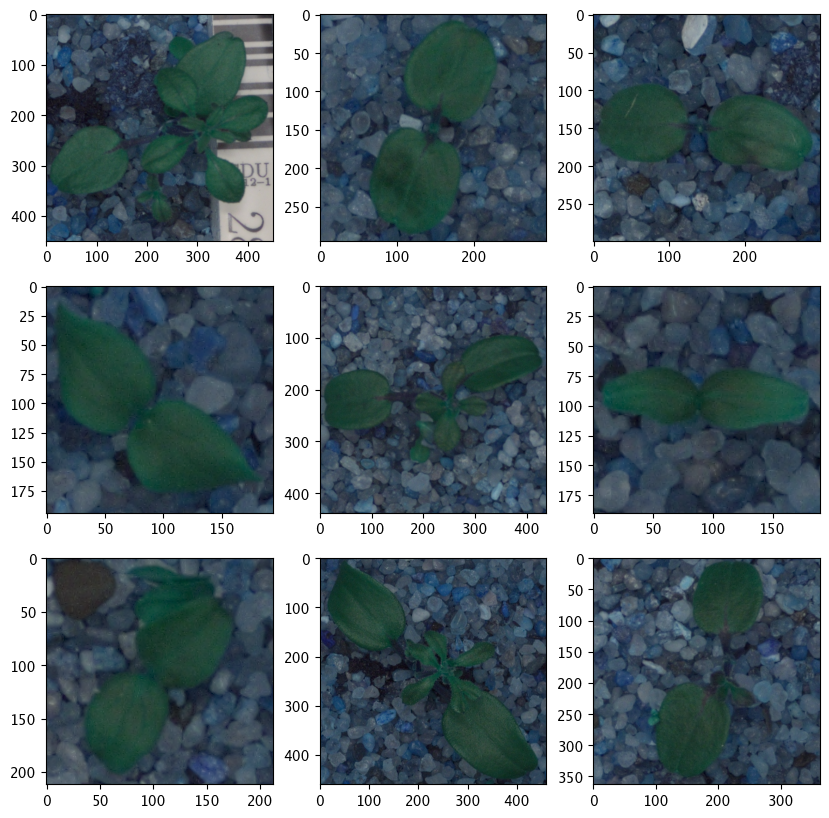

In [14]:
# 이미지 3 X 3 배열
def plot_for_class(df, label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(10, 10))
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            tmp = df[df["target"] == label]
            im = cv2.imread(tmp.loc[n, 'image'])
            axs[i, j].imshow(im)
            n += 1
plot_for_class(images_df, "Cleavers")

# train 셋과 test 셋의 분리

In [15]:

X_train, X_test, y_train, y_test = train_test_split(images_df['image'], images_df['target'], test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(4431,)
(1108,)


In [16]:
# 소수의 training 데이터가 섞였을 경우 나중에 문제 야기
X_train.head()

477           archive/Sugar beet/248.png
527           archive/Sugar beet/105.png
3597               archive/Fat Hen/6.png
853     archive/Common Chickweed/571.png
2181    archive/Loose Silky-bent/233.png
Name: image, dtype: object

In [17]:
# 테스트, 트레인 인덱스 초기화
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_train.head()

0          archive/Sugar beet/248.png
1          archive/Sugar beet/105.png
2               archive/Fat Hen/6.png
3    archive/Common Chickweed/571.png
4    archive/Loose Silky-bent/233.png
Name: image, dtype: object

In [18]:
# train 셋의 각 클래스 안의 이미지 퍼센테이지
y_train.value_counts() / len(y_train)

Loose Silky-bent             0.138343
Common Chickweed             0.127962
Scentless Mayweed            0.109456
Small-flowered Cranesbill    0.103588
Fat Hen                      0.097946
Sugar beet                   0.087339
Charlock                     0.082600
Cleavers                     0.059355
Black-grass                  0.056421
Shepherd’s Purse             0.046716
Maize                        0.045588
Common wheat                 0.044685
Name: target, dtype: float64

In [19]:
# test 셋의 이미지 퍼센테지도 train 셋과 같은 값이어야 함
y_test.value_counts() / len(y_test)

Loose Silky-bent             0.134477
Common Chickweed             0.131769
Scentless Mayweed            0.110108
Small-flowered Cranesbill    0.105596
Fat Hen                      0.093863
Charlock                     0.077617
Sugar beet                   0.068592
Cleavers                     0.064982
Shepherd’s Purse             0.060469
Black-grass                  0.053249
Common wheat                 0.049639
Maize                        0.049639
Name: target, dtype: float64

In [20]:
# 다중 분류(multiclass classification) 위한 타겟 값 준비
encoder = LabelEncoder()
encoder.fit(y_train)

train_y = np_utils.to_categorical(encoder.transform(y_train))
test_y = np_utils.to_categorical(encoder.transform(y_test))

train_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
# 이미지 크기 통일
IMAGE_SIZE = 150

def im_resize(df, n):
    im = cv2.imread(df[n])
    im = cv2.resize(im, (IMAGE_SIZE, IMAGE_SIZE))
    return im

tmp = im_resize(X_train, 7)
tmp.shape

(150, 150, 3)

In [22]:
# 데이터 셋의 형태 (n1, n2, n3, n4)로 통일
# n1 = 인덱스 n2, n3 = 각각 가로 세로 길이, n4 = 3색
def create_dataset(df, image_size):
    tmp = np.zeros((len(df), image_size, image_size, 3), dtype="float32")
    for n in range(0, len(df)):
        im = im_resize(df, n)
        tmp[n] = im
    print('Dataset Images shape: {} size: {:,}'.format(tmp.shape, tmp.size))
    return tmp
x_train = create_dataset(X_train, IMAGE_SIZE)
x_test = create_dataset(X_test, IMAGE_SIZE)
# 서로 다른 클래스의 개수
len(y_train.unique())

Dataset Images shape: (4431, 150, 150, 3) size: 299,092,500
Dataset Images shape: (1108, 150, 150, 3) size: 74,790,000


12

In [23]:
# cnn
kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
#model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
#model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
#model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(12, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [24]:
model.compile( Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
batch_size = 10
epochs = 8
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=1, 
                                   verbose=1, mode='max', min_lr=0.00001)              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(
                    x=x_train, 
                    y=train_y,
                    batch_size=batch_size, 
                    validation_split=0.5,
                    epochs=epochs,
                    verbose=2,
                    callbacks=callbacks_list
                )

Epoch 1/8

Epoch 1: val_accuracy improved from -inf to 0.34702, saving model to model.h5
222/222 - 63s - loss: 0.4182 - accuracy: 0.1603 - val_loss: 0.2744 - val_accuracy: 0.3470 - lr: 0.0010 - 63s/epoch - 282ms/step
Epoch 2/8

Epoch 2: val_accuracy improved from 0.34702 to 0.43051, saving model to model.h5
222/222 - 61s - loss: 0.2368 - accuracy: 0.3589 - val_loss: 0.2710 - val_accuracy: 0.4305 - lr: 0.0010 - 61s/epoch - 273ms/step
Epoch 3/8

Epoch 3: val_accuracy improved from 0.43051 to 0.46796, saving model to model.h5
222/222 - 61s - loss: 0.2169 - accuracy: 0.4027 - val_loss: 0.2144 - val_accuracy: 0.4680 - lr: 0.0010 - 61s/epoch - 273ms/step
Epoch 4/8

Epoch 4: val_accuracy improved from 0.46796 to 0.51444, saving model to model.h5
222/222 - 65s - loss: 0.1965 - accuracy: 0.4682 - val_loss: 0.1940 - val_accuracy: 0.5144 - lr: 0.0010 - 65s/epoch - 293ms/step
Epoch 5/8

Epoch 5: val_accuracy improved from 0.51444 to 0.57536, saving model to model.h5
222/222 - 62s - loss: 0.1742 - 

<Figure size 640x480 with 0 Axes>

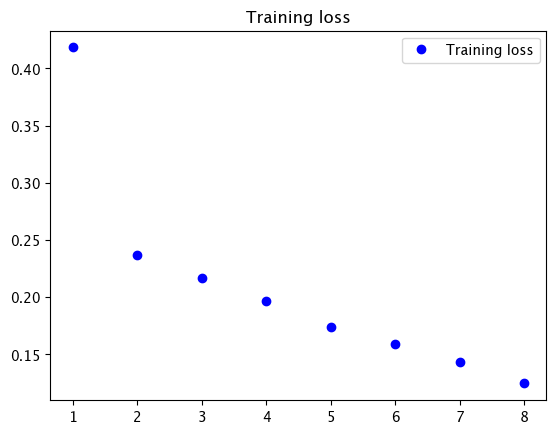

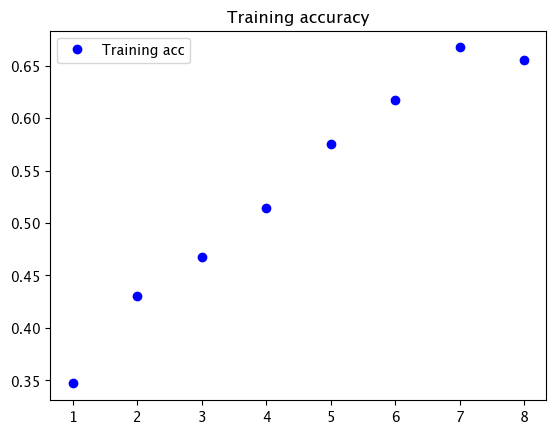

<Figure size 640x480 with 0 Axes>

In [26]:
acc = history.history['val_accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

In [37]:
# 예측 생성
predictions = model.predict(
    x_test,
    verbose = 0 # 로깅 출력 조정 -  0 : 출력 X , 1 : 자세히, 2 : 함축적인 정보만
)
# 예측 검사
predictions

array([[1.7726836e-01, 1.4677734e-05, 8.6828084e-05, ..., 6.6611660e-06,
        1.1231883e-05, 1.8985698e-04],
       [1.2640525e-01, 8.8558254e-06, 7.2171730e-05, ..., 1.9243093e-06,
        2.4009534e-05, 1.3826035e-04],
       [3.0608610e-03, 6.2115821e-03, 3.4034336e-01, ..., 4.7168080e-03,
        2.0912861e-02, 2.0082662e-01],
       ...,
       [1.1471321e-01, 1.3370737e-05, 8.8256464e-05, ..., 3.2643825e-06,
        4.5656128e-05, 1.4148108e-04],
       [9.0912627e-03, 3.3247048e-05, 5.4323382e-04, ..., 2.1962084e-04,
        1.4387429e-05, 9.5144678e-03],
       [1.4527440e-01, 2.1519396e-04, 2.2905247e-04, ..., 4.3633583e-05,
        2.0098877e-04, 6.4483087e-04]], dtype=float32)

In [30]:
# 타겟값 변형
encoder.transform(y_test)

array([0, 6, 2, ..., 0, 5, 6])

In [44]:
cnf_matrix = confusion_matrix(encoder.transform(y_test), predictions['Reached.on.Time_Y.N'] )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
tmp = pd.concat([y_test, pd.Series(encoder.transform(y_test))], axis=1)
tmp.columns = ['class_name', 'class_number']
tmp.drop_duplicates(inplace=True)
tmp.reset_index(drop=True, inplace=True)
tmp = pd.Series(tmp.class_name.values,index=tmp.class_number).to_dict()
tmp

{nan: 'Black-grass',
 nan: 'Loose Silky-bent',
 0.0: nan,
 nan: 'Shepherd’s Purse',
 nan: 'Scentless Mayweed',
 nan: 'Small-flowered Cranesbill',
 nan: 'Common wheat',
 1.0: nan,
 nan: 'Fat Hen',
 6.0: nan,
 nan: 'Maize',
 nan: 'Common Chickweed',
 3.0: nan,
 nan: 'Charlock',
 2.0: nan,
 7.0: nan,
 10.0: nan,
 8.0: nan,
 11.0: nan,
 5.0: nan,
 4.0: nan,
 9.0: nan}

In [38]:
abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']

NameError: name 'cnf_matrix' is not defined

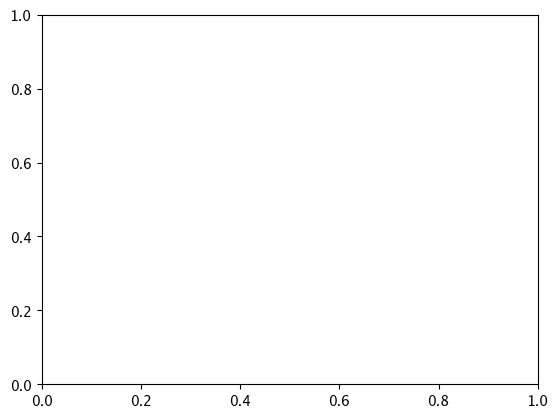

In [40]:
import seaborn as sns

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
#fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import  accuracy_score


accuracy_score(encoder.transform(y_test), predictions, normalize=True, sample_weight=None)